# Decision Tree Classifier

### import libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier 
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data Gathering

In [3]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
np.median(df["Glucose"])

117.0

In [7]:
df["Glucose"] = df["Glucose"].replace({0:np.median(df["Glucose"])})
df["BloodPressure"] = df["BloodPressure"].replace({0:np.median(df["BloodPressure"])})
df["SkinThickness"] = df["SkinThickness"].replace({0:np.median(df["SkinThickness"])})
df["Insulin"] = df["Insulin"].replace({0:np.median(df["Insulin"])})
df["BMI"] = df["BMI"].replace({0:np.median(df["BMI"])})

In [8]:
X = df.drop('Outcome', axis=1)   #df.iloc[:,:-1]
y = df['Outcome']

In [9]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Split Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [13]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84             72             23     30.5  32.0   
618            9      112             82             24     30.5  28.2   
346            1      139             46             19     83.0  28.7   
294            0      161             50             23     30.5  21.9   
231            6      134             80             37    370.0  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35    140.0  28.6   
106            1       96            122             23     30.5  22.4   
270           10      101             86             37     30.5  45.6   
435            0      141             72             23     30.5  42.4   
102            0      125             96             23     30.5  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
..                        ...  ...  
71                      0.411   26  
106                     0.207   27  
270                     1.136   38  
435                     0.205   29  
102                     0.262   21  

[614 rows x 8 columns]

In [14]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33    190.0  34.0   
324            2      112             75             32     30.5  35.7   
624            2      108             64             23     30.5  30.8   
690            8      107             80             23     30.5  24.6   
473            7      136             90             23     30.5  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9      165             88             23     30.5  30.4   
534            1       77             56             30     56.0  33.3   
344            8       95             72             23     30.5  36.8   
296            2      146             70             38    360.0  28.0   
462            8       74             70             40     49.0  35.3   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  
624                     0.158   21  
690                     0.856   34  
473                     0.210   50  
..                        ...  ...  
355                     0.302   49  
534                     1.251   24  
344                     0.485   57  
296                     0.337   29  
462                     0.705   39  

[154 rows x 8 columns]

In [15]:
len(X_train)

614

In [16]:
len(y_test)

154

In [17]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [18]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [19]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

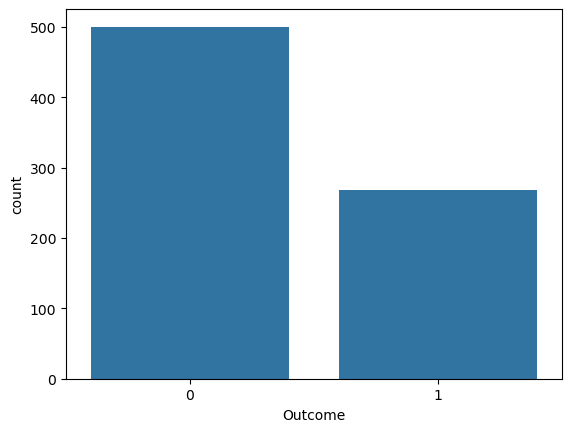

In [20]:
sns.countplot(x=df['Outcome'])
plt.show()

### Build Decision Tree Model

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Testing Data Accuarcy

In [22]:
y_pred_test = dt_model.predict(X_test)
# y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7402597402597403

Classification report is
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154


Confusion matrix
 [[76 23]
 [17 38]]


In [23]:
74+36+25+19

154

In [24]:
(75+40)/154

0.7467532467532467

In [25]:
y_test[10:15]

667    1
212    0
199    1
265    0
760    0
Name: Outcome, dtype: int64

In [26]:
y_pred_test[10:15]

array([1, 1, 0, 1, 0], dtype=int64)

#### Training data accuracy

In [27]:
y_pred_train = dt_model.predict(X_train)
# y_pred_train[10:15]

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 1.0

Classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Confusion matrix
 [[401   0]
 [  0 213]]


#### Plot Decision Tree

In [28]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=X.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes123.png")

### HyperParameter Tuning

#### 1. GridSearchCV()

In [29]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)
                  }
dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv=5)
gscv_dt_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [30]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 5}

In [31]:
best_model = DecisionTreeClassifier(criterion= 'gini',
                     max_depth= 4,
                     min_samples_leaf= 9,
                        min_samples_split= 2)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)

#### Testing Data Accuarcy

In [32]:
y_pred_test = best_model.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7142857142857143

Classification report is
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154


Confusion matrix
 [[70 29]
 [15 40]]


#### Training data accuracy

In [33]:
y_pred_train = best_model.predict(X_train)
y_pred_train[10:15]

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()
conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.7996742671009772

Classification report is
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       401
           1       0.67      0.82      0.74       213

    accuracy                           0.80       614
   macro avg       0.78      0.80      0.79       614
weighted avg       0.82      0.80      0.80       614


Confusion matrix
 [[316  85]
 [ 38 175]]


#### Plot Decision Tree_Grid SearchCV

In [34]:
# plt.figure(figsize=(200,100))
# tree = plot_tree(decision_tree=best_model, feature_names=df.columns,
#                 class_names=['0', '1'], filled=True)
# plt.savefig("DT_diabetes_gscv.png")

#### 2. RandomizedSearchCv()

In [35]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,7),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)
                  }
dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model, hyperparameters, cv=5)
rscv_dt_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [36]:
rscv_dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 6,
 'criterion': 'gini'}

In [37]:
best_model1 = DecisionTreeClassifier(criterion= "entropy",
                     max_depth= 6,
                     min_samples_leaf= 9,
                        min_samples_split= 5)
best_model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=9,
                       min_samples_split=5)

#### Testing Data Accuarcy

In [38]:
y_pred_test = best_model1.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7337662337662337

Classification report is
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154


Confusion matrix
 [[74 25]
 [16 39]]


#### Training data accuracy

In [39]:
y_pred_train = best_model1.predict(X_train)
# y_pred_train[10:15]

test_accuracy = accuracy_score(y_train, y_pred_train)
print("Testing accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7996742671009772

Classification report is
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       401
           1       0.76      0.78      0.77       213

    accuracy                           0.84       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614


Confusion matrix
 [[347  54]
 [ 46 167]]


#### Plot Decision Tree_Randomized SearchCV

In [40]:
# plt.figure(figsize=(200,100))
# tree = plot_tree(decision_tree=best_model, feature_names=df.columns,
#                 class_names=['0', '1'], filled=True)
# plt.savefig("DT_diabetes_rscv.png")

### Pruning

In [41]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
values = dt_model.cost_complexity_pruning_path(X_train, y_train)
# print(values, len(values))
ccp_alphas = values['ccp_alphas']
ccp_alphas, len(ccp_alphas)

(array([0.        , 0.00106603, 0.001396  , 0.00142508, 0.0014477 ,
        0.0014658 , 0.0014806 , 0.0014806 , 0.00153818, 0.00154595,
        0.00161498, 0.00196474, 0.00202179, 0.0020229 , 0.00207285,
        0.00217155, 0.00217155, 0.00217155, 0.00221292, 0.00229642,
        0.00231062, 0.00236897, 0.002443  , 0.00246767, 0.00246767,
        0.00249039, 0.00260586, 0.00260586, 0.00260586, 0.00265712,
        0.002792  , 0.002792  , 0.00281019, 0.00290808, 0.00291445,
        0.00296121, 0.00297817, 0.00307637, 0.00358048, 0.00372424,
        0.00386931, 0.00390879, 0.0039119 , 0.00394305, 0.00402694,
        0.00424246, 0.00442207, 0.00607942, 0.00716578, 0.00826586,
        0.0096877 , 0.01598316, 0.01627998, 0.02311097, 0.02322126,
        0.08048715]),
 56)

In [43]:
len(ccp_alphas)

56

In [44]:
train_accuracy = []
test_accuracy = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [45]:
train_accuracy

[1.0,
 0.998371335504886,
 0.996742671009772,
 0.995114006514658,
 0.993485342019544,
 0.99185667752443,
 0.988599348534202,
 0.988599348534202,
 0.9869706840390879,
 0.9853420195439739,
 0.9837133550488599,
 0.9804560260586319,
 0.9771986970684039,
 0.9723127035830619,
 0.9657980456026058,
 0.9560260586319218,
 0.9560260586319218,
 0.9560260586319218,
 0.9495114006514658,
 0.9446254071661238,
 0.9429967426710097,
 0.9381107491856677,
 0.9332247557003257,
 0.9299674267100977,
 0.9299674267100977,
 0.9299674267100977,
 0.9250814332247557,
 0.9250814332247557,
 0.9250814332247557,
 0.9201954397394136,
 0.9185667752442996,
 0.9185667752442996,
 0.9153094462540716,
 0.9104234527687296,
 0.9071661237785016,
 0.9071661237785016,
 0.8990228013029316,
 0.8990228013029316,
 0.8990228013029316,
 0.8697068403908795,
 0.8648208469055375,
 0.8517915309446255,
 0.8387622149837134,
 0.8387622149837134,
 0.8355048859934854,
 0.8355048859934854,
 0.8338762214983714,
 0.8241042345276873,
 0.786644951140

In [46]:
len(train_accuracy)

56

In [47]:
max(train_accuracy)

1.0

In [48]:
test_accuracy

[0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337662337,
 0.7337662337662337,
 0.7272727272727273,
 0.7337662337662337,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7467532467532467,
 0.7532467532467533,
 0.7532467532467533,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402

In [49]:
max(test_accuracy)

0.7727272727272727

In [50]:
test_accuracy.index(max(test_accuracy))

51

In [51]:
train_accuracy[32]

0.9153094462540716

In [52]:
ccp_alphas[32]

0.0028101865561148947

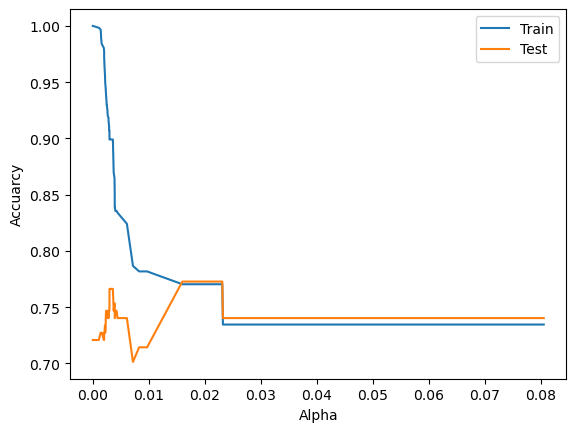

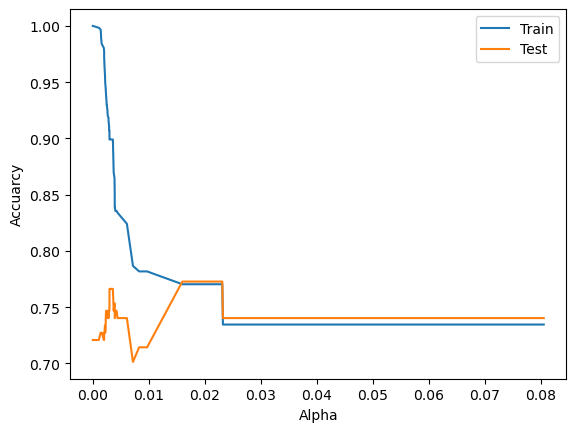

In [54]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, train_accuracy, label = "Train")
ax.plot(ccp_alphas, test_accuracy, label = "Test")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuarcy")
ax.legend()
plt.show()

#### Model Building Pruning

In [55]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0028101865561148947)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0028101865561148947)

#### Test data accuracy_After Pruning

In [56]:
y_pred_test = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7337662337662337

Classification report is
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154


Confusion matrix
 [[77 22]
 [19 36]]


#### Train data accuracy_After Pruning

In [57]:
y_pred_train = dt_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.9120521172638436

Classification report is
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       401
           1       0.91      0.83      0.87       213

    accuracy                           0.91       614
   macro avg       0.91      0.89      0.90       614
weighted avg       0.91      0.91      0.91       614


Confusion matrix
 [[383  18]
 [ 36 177]]


#### Plot Decision Tree for Pruning

In [58]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=df.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_CCP.png")